In [ ]:
!unzip '/content/Datasets.zip'

Archive:  /content/Datasets.zip
   creating: Datasets/Test/
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.jpg  
  inflating: Datasets/Test/lamborghini/19.jpg  
  inflating: Datasets/Test/lamborghini/2.jpg  
  inflating: Datasets/Test/lamborghini/20.jog.jpg  
  inflating: Datasets/Test/lamborghini/21.jpg  
  inflating: Datasets/Test/lamborghini/22.jpg  
  inflating: Datasets/Test/lamborghini/23.jpg  
  inflating: Datasets/Test/lamborghini/24.jpg  
  inflating: Datasets/Test/lamborghini/25.jpg  
  inflating: Datasets/Test/lamborg

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('Datasets/Train/*')

In [ ]:
folders

['Datasets/Train/lamborghini', 'Datasets/Train/mercedes']

In [ ]:
## add more if you want
x = Flatten()(mobilnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 44 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 49 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
2/2 [==============================] - 3s 1s/step - loss: 11.4172 - accuracy: 0.3864 - val_loss: 0.6799 - val_accuracy: 0.6327
Epoch 2/10
2/2 [==============================] - 2s 1s/step - loss: 3.4659 - accuracy: 0.4773 - val_loss: 4.8639 - val_accuracy: 0.3878
Epoch 3/10
2/2 [==============================] - 1s 712ms/step - loss: 3.0675 - accuracy: 0.5682 - val_loss: 1.9622 - val_accuracy: 0.3878
Epoch 4/10
2/2 [==============================] - 2s 1s/step - loss: 0.9521 - accuracy: 0.5682 - val_loss: 0.7597 - val_accuracy: 0.3878
Epoch 5/10
2/2 [==============================] - 1s 728ms/step - loss: 0.6784 - accuracy: 0.5227 - val_loss: 0.6452 - val_accuracy: 0.6122
Epoch 6/10
2/2 [==============================] - 2s 1s/step - loss: 0.7730 - accuracy: 0.4545 - val_loss: 0.6420 - val_accuracy: 0.6122
Epoch 7/10
2/2 [==============================] - 2s 1s/step - loss: 0.7410 - accuracy: 0.4773 

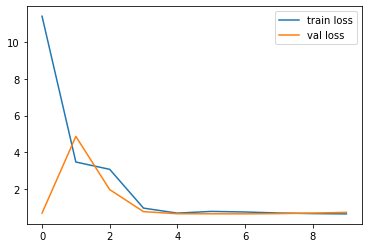

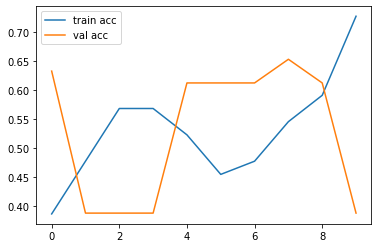

<Figure size 432x288 with 0 Axes>

In [ ]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred 

array([[0.46288604, 0.53711396],
       [0.4285374 , 0.5714626 ],
       [0.46004364, 0.5399564 ],
       [0.40129656, 0.5987035 ],
       [0.31375617, 0.68624383],
       [0.43402258, 0.56597745],
       [0.4251812 , 0.5748188 ],
       [0.45114258, 0.54885745],
       [0.32770616, 0.67229384],
       [0.38541344, 0.61458653],
       [0.42379153, 0.5762085 ],
       [0.39835036, 0.6016496 ],
       [0.3976385 , 0.6023615 ],
       [0.4559125 , 0.5440875 ],
       [0.43572325, 0.56427675],
       [0.40423328, 0.59576666],
       [0.40784284, 0.5921572 ],
       [0.3827589 , 0.61724114],
       [0.49284062, 0.5071594 ],
       [0.45125553, 0.54874444],
       [0.45092472, 0.5490753 ],
       [0.43150932, 0.5684907 ],
       [0.4197819 , 0.5802181 ],
       [0.430385  , 0.569615  ],
       [0.32763925, 0.6723607 ],
       [0.45929033, 0.5407097 ],
       [0.49947464, 0.5005253 ],
       [0.45772785, 0.5422721 ],
       [0.38869733, 0.6113027 ],
       [0.45501506, 0.5449849 ],
       [0.